In [1]:
import sys
sys.path.append("../src") 
from models.mymodels import mymodel4,mymodel3
import hiddenlayer as hl

In [2]:
model=mymodel3()

C:\Anaconda3\lib\site-packages\torch\onnx\symbolic_helper.py:443: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to training  mode. The model will be exported in inference, as specified by the export mode.
  warnings.warn("ONNX export mode is set to " + training_mode +


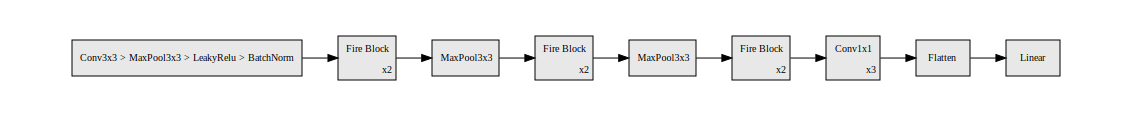

In [3]:
import torch
transforms = [
    # Fold Conv, BN, RELU layers into one
    hl.transforms.Fold("Conv > MaxPool > LeakyRelu >BatchNorm", "ConvMaxPoolRelu"),

    # Fold bottleneck blocks
    hl.transforms.Fold(
        """Conv > Relu > BatchNorm > (Conv | Conv) > Concat > Relu """
       , "Fire Block", "Fire Block"),
    # Fold residual blocks
    hl.transforms.Fold("""Conv > LeakyRelu""",
                       "Conv1x1", "Conv1x1"),
    # Fold repeated blocks
    hl.transforms.FoldDuplicates(),
]

hl.build_graph(model, torch.zeros([1, 1, 224, 224]),transforms=transforms)


In [4]:
from torchsummary import summary
summary(model.to('cuda'), (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 111, 111]             320
         MaxPool2d-2           [-1, 32, 55, 55]               0
         LeakyReLU-3           [-1, 32, 55, 55]               0
       BatchNorm2d-4           [-1, 32, 55, 55]              64
            Conv2d-5           [-1, 16, 55, 55]             528
              ReLU-6           [-1, 16, 55, 55]               0
       BatchNorm2d-7           [-1, 16, 55, 55]              32
            Conv2d-8           [-1, 32, 55, 55]             544
            Conv2d-9           [-1, 32, 55, 55]           4,640
             ReLU-10           [-1, 64, 55, 55]               0
             Fire-11           [-1, 64, 55, 55]               0
           Conv2d-12           [-1, 16, 55, 55]           1,040
             ReLU-13           [-1, 16, 55, 55]               0
      BatchNorm2d-14           [-1, 16,

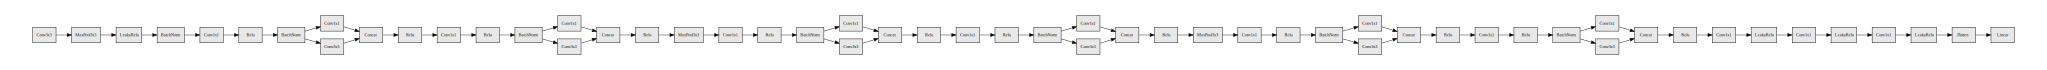

In [6]:
import torch
transforms = [
    # Fold Conv, BN, RELU layers into one

   
    # Fold repeated blocks
    hl.transforms.FoldDuplicates(),
]

hl.build_graph(model, torch.zeros([1, 1, 224, 224]).to('cuda'),transforms=transforms)
